# Demographic Analysis

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data sourced from : https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/data

census_block_loc.csv was orginally sourced from: https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml <br>
- total population, racial/ethnic demographic information, employment and commuting characteristics, and more are contained here

nyc_census_tracts.csv was originally sourced from: https://www.fcc.gov/general/census-block-conversions-api
- This file contains the coordinates and associated census block codes along with the state and county names

In [114]:
blocks_map = pd.read_csv('census_block_loc.csv')
census = pd.read_csv('nyc_census_tracts.csv', index_col=0)

In [115]:
blocks_map.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [116]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [117]:
census.County.unique()

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond'], dtype=object)

Combine both tables on Block Code. (Tract is the first 11 digits BlockCode)

In [118]:
blocks_map = blocks_map[blocks_map.County.isin(['Bronx','Kings','New York','Queens', 'Richmond'])]
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map['Tract'] = blocks_map.BlockCode // 10000
blocks_map = blocks_map.merge(census,how='left',right_index=True,left_on='Tract')

blocks_map.tail()

,Latitude,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
36910,40.914171,-73.919095,360050309000001,Bronx,NY,36005030900,Bronx,Bronx,3896.0,1626.0,...,1.9,6.7,10.3,45.9,1301.0,78.6,10.0,10.5,0.9,5.5
36911,40.914171,-73.915930,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
36912,40.914171,-73.912764,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
36913,40.914171,-73.909598,360050319001002,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3
37111,40.916432,-73.915930,360050319000001,Bronx,NY,36005031900,Bronx,Bronx,645.0,163.0,...,57.4,0.9,6.5,20.3,216.0,88.4,11.6,0.0,0.0,13.3


Use functionality found here (https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data/notebook) to map demographic information.

In [119]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [120]:
def make_plot(blocks, data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(blocks.Latitude,blocks.Longitude,data_values)
    fig, ax = plt.subplots(figsize = [12,12])
    #fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = ax.imshow(values.T,origin='lower',cmap=colors,extent=limits, zorder = 1)
    ax.autoscale(False)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    plt.show()

### Median Household Income by Lat/Long

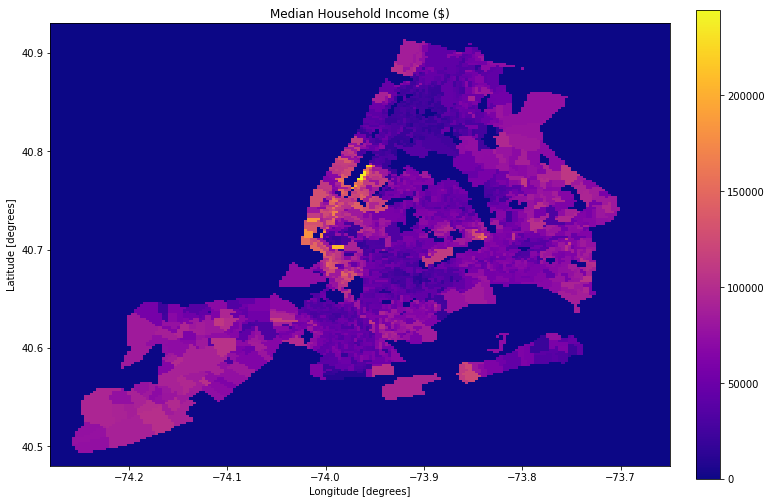

In [121]:
make_plot(blocks_map, blocks_map.Income,colors='plasma',title='Median Household Income ($)')
# make_plot(blocks_map, blocks_map.IncomePerCap,colors='plasma',title='Per Capita Income ($)')

### Percentage of Population Taking Public Transportation to Work

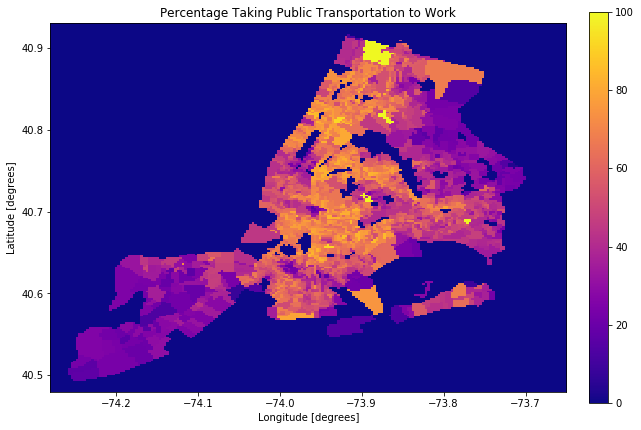

In [38]:
make_plot(blocks_map, blocks_map.Transit,colors='plasma',title='Percentage Taking Public Transportation to Work')

### Female Population Concentrations by Lat/Long

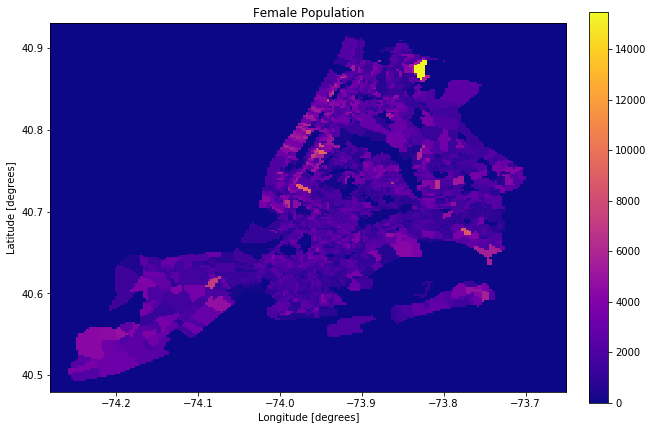

In [39]:
make_plot(blocks_map, blocks_map.Women,colors='plasma',title='Female Population')

In [128]:
blocks_map[['Latitude','Longitude', 'BlockCode', 'County_x', 'Women', 'Men', 'TotalPop']].sort_values('Women',ascending=False).head(35)

,Latitude,Longitude,BlockCode,County_x,Women,Men,TotalPop
34139,40.882513,-73.827286,360050462011016,Bronx,15466.0,13460.0,28926.0
33340,40.873467,-73.824121,360050462011008,Bronx,15466.0,13460.0,28926.0
32339,40.862161,-73.827286,360050462011032,Bronx,15466.0,13460.0,28926.0
34341,40.884774,-73.820955,360050462011002,Bronx,15466.0,13460.0,28926.0
33137,40.871206,-73.833618,360050462018002,Bronx,15466.0,13460.0,28926.0
33537,40.875729,-73.833618,360050462018005,Bronx,15466.0,13460.0,28926.0
33538,40.875729,-73.830452,360050462013004,Bronx,15466.0,13460.0,28926.0
33539,40.875729,-73.827286,360050462014000,Bronx,15466.0,13460.0,28926.0
33540,40.875729,-73.824121,360050462011008,Bronx,15466.0,13460.0,28926.0
33339,40.873467,-73.827286,360050462018005,Bronx,15466.0,13460.0,28926.0


In [41]:
blocks_map.Women.describe()

count    18052.000000
mean      1499.776091
std       1570.619628
min          0.000000
25%          0.000000
50%       1346.000000
75%       2382.000000
max      15466.000000
Name: Women, dtype: float64

Filter for areas with a female population of over 51%, with median household income over $100k and take public transport to work

In [42]:
filtered_blocks = blocks_map[['Latitude', 'Longitude', 'BlockCode', 'County_x', 'Women', 'TotalPop', 'Transit', 'Income']]

In [43]:
filtered_blocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 15 to 37111
Data columns (total 8 columns):
Latitude     18053 non-null float64
Longitude    18053 non-null float64
BlockCode    18053 non-null int64
County_x     18053 non-null object
Women        18052 non-null float64
TotalPop     18052 non-null float64
Transit      12777 non-null float64
Income       11947 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [44]:
filtered_blocks['women_pop_perc'] = np.divide(np.array(filtered_blocks['Women'], int),np.array(filtered_blocks['TotalPop'],int))

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
filtered_blocks.women_pop_perc.describe()

count    13000.000000
mean         0.513941
std          0.101982
min          0.000000
25%          0.489385
50%          0.515745
75%          0.544983
max          1.000000
Name: women_pop_perc, dtype: float64

In [46]:
filtered_blocks.Transit.describe()

count    12777.000000
mean        44.844486
std         20.761257
min          0.000000
25%         27.200000
50%         44.200000
75%         62.200000
max        100.000000
Name: Transit, dtype: float64

In [47]:
#filtered_blocks = filtered_blocks[filtered_blocks.women_pop_perc > 0.51]

In [48]:
#filtered_blocks = filtered_blocks[filtered_blocks.Income >150000]

In [49]:
#filtered_blocks = filtered_blocks[filtered_blocks.Transit > 40]

In [50]:
filtered_blocks.describe()

,Latitude,Longitude,BlockCode,Women,TotalPop,Transit,Income,women_pop_perc
count,18053.000000,18053.000000,1.805300e+04,18052.000000,18052.000000,12777.000000,11947.000000,13000.000000
mean,40.663945,-73.938191,3.606427e+14,1499.776091,2911.090682,44.844486,66464.034737,0.513941
std,0.108223,0.130486,2.647918e+11,1570.619628,2963.959357,20.761257,26952.609291,0.101982
min,40.480000,-74.257839,3.600500e+14,0.000000,0.000000,0.000000,9829.000000,0.000000
25%,40.572714,-74.020402,3.604707e+14,0.000000,0.000000,27.200000,45991.000000,0.489385
50%,40.645075,-73.915930,3.608106e+14,1346.000000,2627.000000,44.200000,66250.000000,0.515745
75%,40.746834,-73.836784,3.608199e+14,2382.000000,4586.000000,62.200000,84559.000000,0.544983
max,40.916432,-73.700653,3.608599e+14,15466.000000,28926.000000,100.000000,244375.000000,1.000000


In [51]:
filtered_blocks

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
15,40.480000,-74.232513,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
16,40.480000,-74.229347,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
17,40.480000,-74.226181,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
18,40.480000,-74.223015,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
19,40.480000,-74.219849,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
20,40.480000,-74.216683,360859901000010,Richmond,0.0,0.0,NaN,NaN,NaN
21,40.480000,-74.213518,360859901000010,Richmond,0.0,0.0,NaN,NaN,NaN
137,40.482261,-74.238844,360859901000012,Richmond,0.0,0.0,NaN,NaN,NaN
138,40.482261,-74.235678,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN
139,40.482261,-74.232513,360859901000011,Richmond,0.0,0.0,NaN,NaN,NaN


In [88]:
top_stations = [['34 St - Penn Station',40.7520, -73.9933], 
                ['34 St - Herald Sq',40.7496, -73.9877], 
                ['Grand Central 42nd St',40.7527, -73.9772] , 
                ['Times Sq 42nd St',40.7553, -73.9869],
                ['23 St', 40.7427, -73.9926],
                ['86 St',40.4640,-73.5706] ,
                ['Fulton St', 40.7094, 74.0083], 
                ['59 St', 40.7684, -73.9818],
                ['125 St',40.8049, 73.9385],
                ['14 St-Union Sq',40.4429,-73.5914],
                ['47-50 Sts Rock',40.7587, 73.9813],
                ['Flushing-Main', 40.7584, 73.8305] ,
                ['96 St',40.7942, 73.9721],
                ['42 St-Port Auth',40.4525, -73.5923],
                ['14 St',40.7388, -73.9997], 
                ['59 St Columbus', 40.4659, -73.5854],
                ['Canal St', 40.4373, -74.0036],
                ['50 St', 40.761, -73.9840],
                ['72 St', 40.468, -73.5730], 
                ['28 St',40.7433, 73.9841]]


In [89]:
top_stations_df = pd.DataFrame(data = top_stations, columns = ['Station', 'Lat','Long'])

In [90]:
top_stations_df

,Station,Lat,Long
0,34 St - Penn Station,40.7520,-73.9933
1,34 St - Herald Sq,40.7496,-73.9877
2,Grand Central 42nd St,40.7527,-73.9772
3,Times Sq 42nd St,40.7553,-73.9869
4,23 St,40.7427,-73.9926
5,86 St,40.4640,-73.5706
6,Fulton St,40.7094,74.0083
7,59 St,40.7684,-73.9818
8,125 St,40.8049,73.9385
9,14 St-Union Sq,40.4429,-73.5914


### Demographics in half square mile around 34 - Penn St Station
40.7520	-73.9933

In [145]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.753) & (filtered_blocks['Latitude'] > 40.751))&((filtered_blocks['Longitude']>-73.995)&(filtered_blocks['Longitude']<-73.991))]#.describe()

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22487,40.751357,-73.99191,360610101001002,New York,501.0,1259.0,41.1,159821.0,0.397935


## Demographics in half square mile around 34 St - Herald Sq
40.7496	-73.9877

In [129]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.750) & (filtered_blocks['Latitude'] > 40.747))&((filtered_blocks['Longitude']>-73.986)&(filtered_blocks['Longitude']<-73.984))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22289,40.749095,-73.985578,360610076001000,New York,1069.0,1912.0,36.5,103264.0,0.5591


## Demographics in half square mile around Grand Central 42nd St	
40.7527	-73.9772

In [142]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.754) & (filtered_blocks['Latitude'] > 40.752))&((filtered_blocks['Longitude']>-73.977)&(filtered_blocks['Longitude']<-73.976))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22692,40.753618,-73.97608,360610092001008,New York,895.0,1717.0,37.2,122379.0,0.521258


## Demographic in half square mile around Times Sq 42nd St	
40.7553	-73.9869

In [143]:
filtered_blocks[((filtered_blocks['Latitude'] < 40.756) & (filtered_blocks['Latitude'] > 40.754))&((filtered_blocks['Longitude']>-73.989)&(filtered_blocks['Longitude']<-73.984))]

,Latitude,Longitude,BlockCode,County_x,Women,TotalPop,Transit,Income,women_pop_perc
22888,40.755879,-73.988744,360610113001003,New York,30.0,126.0,44.4,82361.0,0.238095
22889,40.755879,-73.985578,360610119001005,New York,369.0,1068.0,23.9,11671.0,0.345506
